# 신경망 학습
- 학습 : 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
- 손실 함수 : 신경망이 학습할 수 있도록 해 주는 지표
- 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표

> 퍼셉트론도 직선으로 분리할 수 있는 문제라면 자동으로 학습 가능.  
> 선형 분리 가능 문제는 유한 번의 학습을 통해 풀 수 있다는 사실이 퍼셉트론 수렴 정리(perceptron convergence theorem)로 증명됨.  
> 비선형 분리 문제는 자동으로 학습할 수 없다.

> 딥러닝을 종단간(終端間) 기계학습(end-to-end machine learning)이라고도 함. 데이터(입력)에서 목표한 결과(출력)를 사람의 개입 없이 얻는다는 의미

- 기계학습 문제는 훈련 데이터(training data)와 시험 데이터(test data)로 나눠 학습과 실험을 수행하는 것이 일반적임.  
훈련 데이터만 사용하여 최적의 매개변수를 찾고 시험 데이터를 사용하여 훈련한 모델을 평가.
> 훈련 데이터와 시험 데이터를 나누는 이유 : 범용 능력을 제대로 평가하기 위해서  
<br/>
> 오버피팅(overfitting) : 한 데이터에만 지나치게 최적화된 상태. (과적합, 과대적합, 과학습, 과적응 등)

### 손실 함수(loss function)

- 손실 함수는 신경망 성능의 '나쁨'을 나타내는 지표로, 현재의 신경망이 훈련 데이터를 얼마나 잘 처리하지 못하는지를 나타냄.  
비용 함수(cost function)라고도 함

#### 1. 오차제곱합(sum of squares for error, SSE) : 가장 많이 쓰이는 손실 함수

$$ E = \frac{1}{2}\sum_k(y_k - t_k)^2 $$

$y_k$는 신경망의 출력(신경망이 추정한 값), $t_k$는 정답 레이블, $k$는 데이터의 차원수

In [1]:
import numpy as np

def sum_squares_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

In [2]:
# 정답이 2일 때, 2일 확률이 가장 높다고 추정

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0., 0.05, 0.1, 0., 0.1, 0., 0.]
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [3]:
# 정답이 2일 때, 7일 확률이 가장 높다고 추정

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.1, 0., 0.05, 0.1, 0., 0.6, 0., 0.]
sum_squares_error(np.array(y), np.array(t))

0.5975

- 즉, 오차제곱합 기준으로 첫 번째 추정 결과가 (오차가 더 작으니) 정답에 더 가까울 것으로 판단

#### 2. 교차 엔트로피 오차(cross entropy error, CEE)

$$ E = -\sum_k t_k \log y_k $$

log는 밑이 e인 자연로그($\log_e$). $y_k$는 신경망의 출력, $t_k$는 정답 레이블(원-핫 인코딩)  
결과, 정답일 때의 추정($t_k$가 1일 때의 $y_k$)의 자연로그를 계산하는 식.

<ipython-input-16-d9f41d692c37>:3: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)


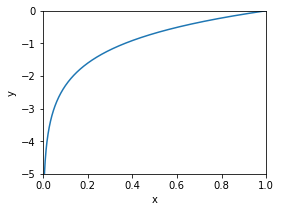

In [16]:
import matplotlib.pyplot as plt
x = np.arange(0., 1., 0.001)
y = np.log(x)

plt.figure(figsize=(4, 3))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, 1)
plt.ylim(-5, 0)
plt.show()

In [19]:
# 교차 엔트로피 구현
def cross_entropy_error(y, t):      # y, t는 넘파이 배열
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))       # np.log() 함수에 0을 입력하면 마이너스 무한대(-inf)가 되어 계산 진행 불가 >> 아주 작은 값(delta)를 더해 마이너스 무한대가 발생하지 않도록 조치함

In [21]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0., 0.05, 0.1, 0., 0.1, 0., 0.]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [22]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.1, 0., 0.05, 0.1, 0., 0.6, 0., 0.]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

- 교차 엔트로피 오차 기준으로 첫 번째 추정 결과가 (오차가 더 작으니) 정답에 더 가까울 것으로 판단, 오차제곱합의 판단과 일치

### 미니배치 학습

- 기계학습 문제는 훈련 데이터를 사용해 학습한다. >> 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾아낸다.  
즉, 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야 함.  
<br/>
훈련 데이터 전체에 대한 손실함수의 합 구하기

$$ E = -\frac{1}{N}\sum_n \sum_k t_{nk} \log y_{nk} $$

데이터가 $N$개라면 $t_{nk}$는 n번째 데이터의 k번째 값을 의미($y_{nk}$는 신경망의 출력, $t_{nk}$는 정답 레이블)  
마지막에 N으로 나누어 정규화 >> 평균 손실 함수

- 미니배치(mini-batch) : 데이터 일부를 추려 전체의 근사치로 이용함. 신경망 학습 시에도 훈련 데이터 중 일부만 골라 학습 수행.

In [25]:
import sys, os
sys.path.append(os.pardir)
from basic_DL.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape, t_train.shape)

(60000, 784) (60000, 10)


In [26]:
# 위의 훈련 데이터에서 무작위로 10장 빼내기
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)       # np.random.choice()는 지정한 범위의 수 중 무작위로 원하는 개수만큼 거낼 수 있음
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

- (배치용) 교차 엔트로피 오차 구현

In [28]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

y는 신경망의 출력, t는 정답 레이블  
y가 1차원이라면(=데이터 하나당 교차 엔트로피 오차를 구한다면) reshape로 데이터 형상 변환  
배치 크기로 나눠 정규화하고, 이미지 1장당 평균 교차 엔트로피 오차를 계산한다

In [29]:
# 정답 레이블이 원-핫 인코딩이 아니라 숫자 레이블로 주어진 경우 교차 엔트로피 오차 구현

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

정답에 해당하는 신경만의 출력만으로 교차 엔트로피 오차를 계산할 수 있다 >> $ t * np.log(y)$였던 부분을 $np.log(y[np.arange(batch_size), t])$로 구현함  
<br/>
np.log(y[np.arange(batch_size), t])  
np.arange(batch_size)는 0부터 batch_size-1까지의 배열을 생성한다  
y[np.arange(batch_size), t]는 각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출

- 손실 함수를 설정하는 이유  
궁극적인 목적인 높은 정확도를 끌어내는 매개변수 값을 찾는 것인데, 정확도라는 지표를 두고 손실 함수의 값이라는 우회적인 방법을 택하는 이유  
> 정확도를 지표로 하면 매개변수의 미분(기울기)이 대부분 0이 되기 때문

#### 수치 미분

미분은 한순간의 변화량을 표시한 것
$$
\frac{df(x)}{dx} = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}
$$

In [31]:
# 나쁜 구현 예
def numerical_diff(f, x):
    h = 1e-50
    return (f(x + h) - f(x)) / h

# 수치 미분(numerical differentiation)
# h에 가급적 작은 값을 대입하려고 1e-50를 이용했으나 반올림 오차(rounding error, 작은값이 생략되어 최종 계산 결과에 오차 발생)가 발생함.
np.float32(1e-50)

0.0

> 미세한 값 h로 $10^{-4}$ 정도의 값을 사용하면 좋은 결과를 얻는다고 알려져 있다고 함

In [32]:
def numerical_diff(f, x):
    h = 1e-4        # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

In [33]:
# 수치 미분의 예
def function_1(x):
    return 0.01*x**2 + 0.1*x

$$y = 0.01x^2+0.1x$$

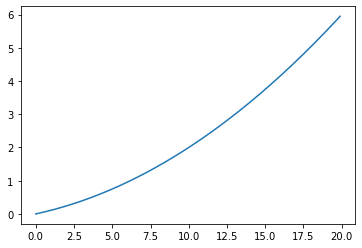

In [34]:
x = np.arange(0., 20., 0.1)
y = function_1(x)
plt.plot(x, y)
plt.show()

In [35]:
numerical_diff(function_1, 5), numerical_diff(function_1, 10)

(0.1999999999990898, 0.2999999999986347)

x가 5일 때의 10일 때 해석적 미분의 값은 0.2, 0.3이다.

0.1999999999990898


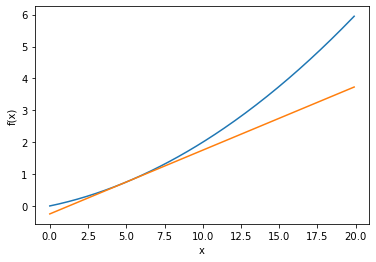

In [36]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

0.2999999999986347


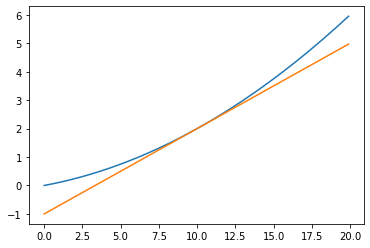

In [37]:
tf = tangent_line(function_1, 10)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

In [38]:
# 편미분 이하 125p

#### 기울기(gradient) : 모든 변수의 편미분을 벡터로 정리한 것
- 각 지점에서 낮아지는 방향, 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향

In [39]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    return grad

#### 경사법(gradient method)
- 최솟값을 찾으면 경사 하강법(gradient descent method), 최댓값을 찾으면 경사 상승법(gradient ascent method)  
이라고 하는데, 손실 함수의 부호를 반전시키면 같아져서 하강이냐 상승이냐는 본질적으로 중요하지 않음

- 경사 하강법 구현

In [40]:
# f는 최적화하려는 함수, init_x는 초깃값, lr은 learning rate(학습률), step_num은 경사법에 따른 반복 횟수
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)     # 함수의 기울기
        x -= lr * grad
    return x

In [41]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3., 4.])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

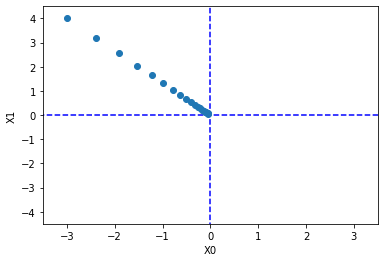

In [42]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [52]:
# 학습률이 너무 큰 예 : lr = 10.0
init_x = np.array([-3., 4.])
gradient_descent(function_2, init_x=init_x, lr=10., step_num=100)

(array([-2.58983747e+13, -1.29524862e+12]),
 array([[-3.00000000e+00,  4.00000000e+00],
        [ 5.70000000e+01, -7.60000000e+01],
        [-1.08300000e+03,  1.44400000e+03],
        [ 2.05770000e+04, -2.74360000e+04],
        [-3.90963008e+05,  5.21284002e+05],
        [ 7.42829664e+06, -9.90439654e+06],
        [-1.41137328e+08,  1.88183103e+08],
        [ 2.68126267e+09, -3.57501690e+09],
        [-5.09763373e+10,  6.79001831e+10],
        [ 9.45170863e+11, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.295

In [51]:
# 학습률이 너무 작은 예 : lr = 1e-10
init_x = np.array([-3., 4.])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

(array([-2.99999994,  3.99999992]),
 array([[-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  3.99999999],
        [-3.        ,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999998,  3.99999998],
        [-2.99999998,  3.999

- 학습률과 같은 매개변수를 하이퍼파라미터(hyper parameter, 초매개변수)라고 한다.  
가중치, 편향 같은 신경망의 매개변수와는 성질이 다름.  
신경망의 가중치 매개변수는 훈련 데이터와 학습 알고리즘에 의해 자동으로 얻어지는 매개변수고,  
학습률 같은 하이퍼파라미터는 사람이 직접 설정해야 하는 매개변수.

In [56]:
# 간단한 신경망을 예로 실제 기울기를 구해보자

from basic_DL.functions import softmax, cross_entropy_error
from basic_DL.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)   # 정규분포로 초기화
    
    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [60]:
net = simpleNet()
print(net.W)

[[-0.01589695 -0.1021887   0.75810713]
 [ 0.61993271  0.99288935 -0.74246358]]


In [61]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 0.54840127  0.83228719 -0.21335295]


In [62]:
np.argmax(p)

1

In [63]:
t = np.array([0, 0, 1])
net.loss(x, t)

1.7896315729827943

In [64]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.21465908  0.28512766 -0.49978674]
 [ 0.32198862  0.4276915  -0.74968012]]


- (0,0)은 대략 0.2이니 $w_{11}$을 h만큼 늘리면 손실 함수의 값은 0.2h만큼 증가한다는 의미.  
(2,2)는 대략 -0.7이니 h만큼 늘리면 손실 함수의 값은 0.5h만큼 감소함.  
>그래서 손실 함수를 줄인다는 관점에서는 (2, 2)는 양의 방향으로 갱신하고, (0, 0)은 음의 방향으로 갱신해야 함을 알 수 있음, 또한 한 번에 갱신되는 양에는 (2,2)가 (0,0)보다 크게 기여한다는 사실도 알 수 있다

In [65]:
# 위의 함수를 람다식으로
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

### 신경망 학습의 절차
0. 전제  
신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라고 한다. 신경망 학습은 다음과 같이 4단계로 수행한다.
<br/>
<br/>
1. 1단계 - 미니배치  
훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실함수 값을 줄이는 것이 목표. (무작위 선정이라 확률적 경사 하강법, stochastic gradient descent이라고 부름, SGD)
<br/>
<br/>
2. 2단계 - 기울기 산출  
미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시함
<br/>
<br/>
3. 3단계 - 매개변수 갱신  
가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.
<br/>
<br/>
4. 4단계 - 반복  
1~3단계를 반복한다.

In [67]:
# 2층 신경망 클래스 구현
from basic_DL.functions import sigmoid

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y
    
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads        # 139p

In [68]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape, net.params['b1'].shape, net.params['W2'].shape, net.params['b2'].shape

((784, 100), (100,), (100, 10), (10,))

In [69]:
# 예측 처리
x = np.random.rand(100, 784)
y = net.predict(x)

In [70]:
x = np.random.rand(100, 784)    # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10)     # 더미 정답 데이터(100장 분량)

grads = net.numerical_gradient(x, t)    # 기울기 계산(수치 미분 방식)

grads['W1'].shape, grads['b1'].shape, grads['W2'].shape, grads['b2'].shape

((784, 100), (100,), (100, 10), (10,))

In [73]:
# 미니배치 학습 구현
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [74]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000   # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100    # 미니배치 크기
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)     # 오차역전파법
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

In [ ]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000   # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100    # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)     # 오차역전파법
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc, test acc | ' + str(train_acc) + ", "+ str(test_acc))

### 정리
신경망 학습  
신경망이 학습을 수행할 수 있도록 손실 함수라는 지표를 도입, 이 손실 함수를 기준으로 그 값이 가장 작아지는 가중치 매개변수를 찾아내는 것이 신경망 학습의 목표이다.  
가능한 한 작은 손실 함수의 값을 찾는 방법으로 경사법 소개. 경사법은 함수의 기울기를 이용하는 방법

- 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용한다.
- 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가한다.
- 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다.
- 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다.
- 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라고 한다.
- 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.
- 수치 미분을 이용한 계산에는 시간이 걸리지만 그 구현은 간단하다. 다음 장에서 구현하는 (다소 복잡한) 오차역전파법은 기울기를 고속으로 구할 수 있다.